Investigar si los datasets tienen encabezados, datos nulos, sustituir los datos nulos si es que existieran, y en qué columna se encuentra la salida. Finalmente obtener las matrices X y Y.
Obtener el modelo "W" óptimo de cada dataset utilizando el optimizador Gradiente Descendente.
Obtener el ACCURACY de sus modelos y comparar los desempeños de cada modelo.
También obtener ROC, AUC, y la MATRIZ DE CONFUSIÓN de forma gráfica, de cada modelo
¿Qué modelo es mejor y cuál es la razón?
Implementar la Regresión Logística utilizando la librería de Sklearn, comparar el Score de la librería con el Accuracy que ustedes calcularon del Gradiente Descendente.
En un documento en Jupyter deberán incluir:

    La lectura de los datasets y su transformación a las matrices X y Y, respectivamente
    La implementación de la regresión logística utilizando el GD, y sus mediciones de desempeño
    La implementación de la regresión logística utilizando la librería Sklearn y su score para cada dataset
    Hacer dos comparaciones:
        Las mediciones de cada dataset utilizando GD y Sklearn
        Las resultados obtenidos entre datasets
    Responder la pregunta: ¿Por qué el modelo de un dataset tiene mejor desempeño que el otro?, sustentar su respuesta.

Subir el Notebook correspondiente, incluyendo anotaciones, comentarios, títulos y subtítulos.

# Skalearn library
spambase dataset

In [2]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [3]:
#1. Load dataset
data = pd.read_csv('spambase.data', header = None)
data.head()
# data

dataset = np.array(data)
m, n = np.shape(dataset)
print('Rows:', m, 'Columns:', n)

x = dataset[:, 0:57]
y = dataset[:, -1]
y = y.reshape(-1, 1)
print('x:', np.shape(x))
print('y:', np.shape(y))

Rows: 4601 Columns: 58
x: (4601, 57)
y: (4601, 1)


In [4]:
#Normalize
def normalize(x):
    x_norm = (x - np.mean(x, axis=0)) / np.std(x,axis=0)
    return x_norm

# scaler = StandardScaler()
# scaler.fit(x)

X_norm = normalize(x)


In [8]:
#2. Prepare data: add Bias and split dataset

print(np.shape(X_norm))

def Bias(X):
    ones = np.ones((len(X),1))
    X1 = np.concatenate((ones, X), axis=1)
    return X1

x = Bias(X_norm)

print('x shape: ', np.shape(x))

test_size = 0.2
xTrain, xTest, yTrain, yTest = train_test_split(x, y,test_size = test_size)
print('Split X', len(x), 'rows into train with', len(xTrain), 'and test with', len(xTest))
print('Split Y', len(y), 'rows into train with', len(yTrain), 'and test with', len(yTest))


yTrain = yTrain.reshape(-1,1)
yTest = yTest.reshape(-1,1)

print('xTrain shape:',np.shape(xTrain), 'yTrain shape:', np.shape(yTrain))
print('xTest shape:', np.shape(xTest), 'yTest shape:', np.shape(yTest))


(4601, 57)
x shape:  (4601, 58)
Split X 4601 rows into train with 3680 and test with 921
Split Y 4601 rows into train with 3680 and test with 921
xTrain shape: (3680, 58) yTrain shape: (3680, 1)
xTest shape: (921, 58) yTest shape: (921, 1)


In [9]:
logReg = LogisticRegression(solver = 'lbfgs')
logReg.fit(xTrain, yTrain)

C:\Users\diegu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\diegu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [141]:
#3.1 Logistic function
def h(x, w):
    wx = np.dot(x, w.T)
    z = 1 / (1 + np.exp(-wx))
    return z

In [142]:
#3.2 Cost function
def cost(x, y, w):
    m, n = np.shape(x)
    c = (-1 / m)*np.sum(y * np.log(h(x, w)) + (1 - y) * np.log((1 - h(x, w))))
    return c


In [143]:
#3.3 Gradient function
def grad(x, y, w):
    m, n = np.shape(x)
    g = (1 / m) * np.dot(x.T,(h(x, w)-y))
    return g

In [144]:
# 3.4 Gradient Descent function
def gd(x, y, w, alpha = 0.001, its = 1000):
    it = 0
    costo = 0
    J = {}
    while it < its:
        # Gradient
        gradiente = grad(x, y, w)
            
        #Cost function
        costo = cost(x, y, w)
            
        #Updating w
        w = w - alpha * gradiente.T
                
        #Storing cost
        J[it] = costo
   
        it += 1
              
    return w, J

Initial Cost (training data): 0.6931471805599452


C:\Users\diegu\AppData\Local\Temp\ipykernel_18480\4009325281.py:4: RuntimeWarning: divide by zero encountered in log
  c = (-1 / m)*np.sum(y * np.log(h(x, w)) + (1 - y) * np.log((1 - h(x, w))))
C:\Users\diegu\AppData\Local\Temp\ipykernel_18480\4009325281.py:4: RuntimeWarning: invalid value encountered in multiply
  c = (-1 / m)*np.sum(y * np.log(h(x, w)) + (1 - y) * np.log((1 - h(x, w))))


Cost after training (training data): nan
Cost after training (testing data): 0.21318226563037476
W: [[-0.91902052 -0.094034   -0.15707702  0.10237124  0.27362208  0.3684479
   0.17859933  0.94465868  0.31837838  0.14081088  0.05396535  0.03540456
  -0.13225643 -0.02407029  0.02284633  0.25189991  0.43681511  0.38234608
   0.17187182  0.1760808   0.41321674  0.24412539  0.39350997  0.87892813
   0.36490295 -1.02938005 -0.65265844 -0.92816951  0.12505758 -0.3556112
  -0.3289507  -0.15932651 -0.09375059 -0.37797184 -0.07727091 -0.3522221
   0.20078948 -0.20639354 -0.06266128 -0.25487985 -0.10597277 -0.38182771
  -0.60066434 -0.20476194 -0.47653355 -0.54478905 -0.65491659 -0.17189719
  -0.34396006 -0.3426875  -0.03037589 -0.0561153   0.44175377  1.10856109
   0.30372953  0.19778652  0.62169675  0.39648038]]


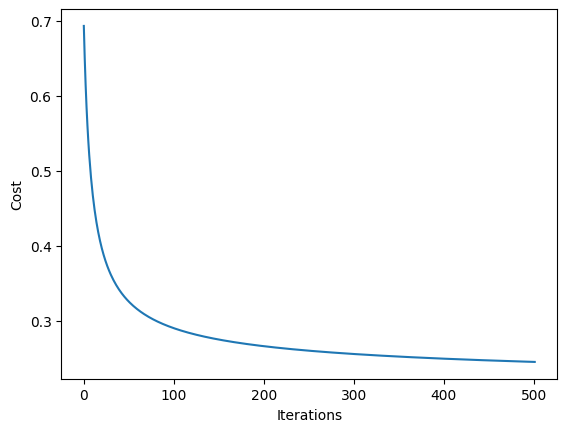

In [145]:
# Test the gradient descent
alpha = 0.1
its = 1000

m, n = np.shape(x)
w = np.zeros((1, n))

print('Initial Cost (training data):', cost(xTrain, yTrain, w))

#Gradient
w, J = gd(xTrain, yTrain, w, alpha, its)

print('Cost after training (training data):', cost(xTrain, yTrain, w))
print('Cost after training (testing data):', cost(xTest, yTest, w))

print('W:',w)

#Plot the cost over the iterations
plt.plot(J.keys(), J.values())
plt.xlabel('Iterations')
plt.ylabel('Cost');

In [146]:
# 4.1 Accuracy

def accuracy(x, y, w):

    Ynew = list(map(lambda x: 1 if x >= 0.5 else 0, h(x, w)))

    Ynew = np.array(Ynew)
    Ynew = Ynew.reshape(-1, 1)
    suma = (y == Ynew).sum()

    a = suma/len(y)

    return a, suma


accTrain, tptnTrain = accuracy(xTrain, yTrain, w)
accTest, tptnTest = accuracy(xTest, yTest, w)
print('Training accuracy:', accTrain, tptnTrain, 'out of', len(yTrain))
print('Testing accuracy:', accTest, tptnTest, 'out of', len(yTest))


Training accuracy: 0.9236413043478261 3399 out of 3680
Testing accuracy: 0.9174809989142236 845 out of 921


In [147]:
# 4.2 Obtain TPR and FPR

# a) Define the prediction function for a variable threshold
def predict(p, threshold):
    y_hat = list(map(lambda x: 1 if x >= threshold else 0, p))
    return y_hat

# b) Define the values function, where you can count the tp, tn, fp, and fn


def values(y, pred):

    # YOURCODE
    tp = tn = fn = fp = 0
    for i in range(len(y)):
        if y[i]:
            if y[i] == pred[i]:
                tp += 1
            else:
                fn += 1
        else:
            if y[i] == pred[i]:
                tn += 1
            else:
                fp += 1

    V = {'TP': tp, 'TN': tn, 'FN': fn, 'FP': fp}
    return V

# c) Define the TPR function


def tpr(V):

    tpr = V["TP"] / (V["TP"] + V["FN"])

    return tpr

# d) Define the FPR function


def fpr(V):

    fpr = V["FP"] / (V["FP"] + V['TN'])

    return fpr


# Test your functions
pred = predict(h(x, w), 0.5)
Val = values(yTrain, pred)
print('Prediction shape: ', np.shape(pred))
print('Values: ', Val)

print('Sensitivity (TPR): %.2F' %
      tpr(Val), 'portion were correctly classified as TP')
print('FPR: %.2F' % fpr(Val), 'portion were classified as FP')


Prediction shape:  (4601,)
Values:  {'TP': 635, 'TN': 1230, 'FN': 801, 'FP': 1014}
Sensitivity (TPR): 0.44 portion were correctly classified as TP
FPR: 0.45 portion were classified as FP


Text(0.5, 1.0, 'Receiver Operating Characteristic')

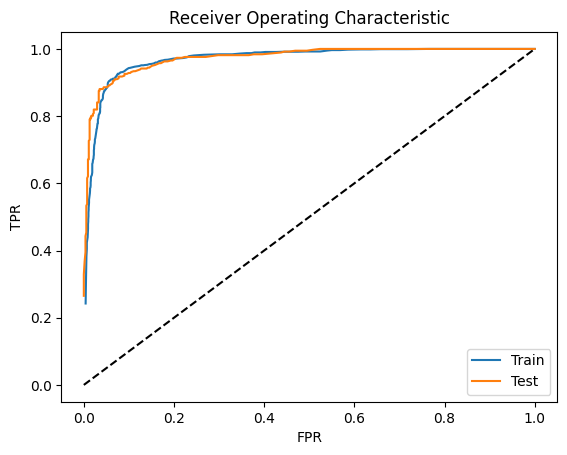

In [148]:
def ROC(y, p):

    # YOURCODE
    threshold = np.arange(0, 1, 0.005)
    TPR = np.zeros(len(threshold))
    FPR = np.zeros(len(threshold))

    for thr in range(len(threshold)):
        pred = predict(p, threshold[thr])
        TPR[thr] = tpr(values(y, pred))
        FPR[thr] = fpr(values(y, pred))

    return TPR, FPR


# ROC curve for Training
Tpr, Fpr = ROC(yTrain, h(xTrain, w))
plt.plot([0, 1], [0, 1], 'k--',)
plt.plot(Fpr, Tpr, '-', label="Train")

# ROC curve for Testing
Tpr1, Fpr1 = ROC(yTest, h(xTest, w))
plt.plot(Fpr1, Tpr1, '-', label="Test")

# Plot the curves
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('Receiver Operating Characteristic')


In [149]:
# AUC (Area under curve) calculus

# AUC for Training
rectangle_roc = 0
rectangle_roc1 = 0
for i in range(len(Tpr)-1):
    rectangle_roc += (Fpr[i] - Fpr[i+1]) * Tpr[i]
print('AUC Training: ', rectangle_roc)

# AUC for Testing

for i in range(len(Tpr1)-1):
    rectangle_roc1 += (Fpr1[i] - Fpr1[i+1]) * Tpr1[i]
print('AUC Testing: ', rectangle_roc1)


AUC Training:  0.9697273819631681
AUC Testing:  0.9739916523638631


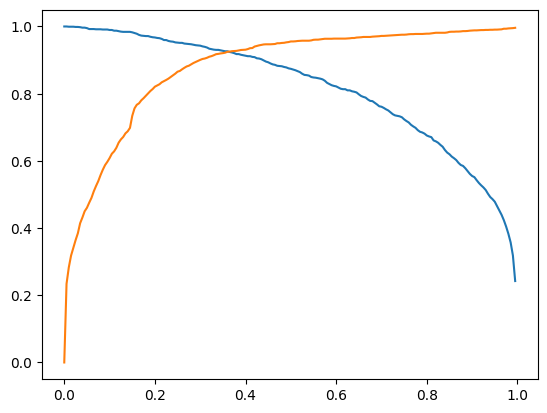

In [150]:
# Specificity and Sensitivity behaviour

thrs = np.arange(0, 1, 0.005)
plt.plot(thrs, Tpr)
plt.plot(thrs, 1 - Fpr)


In [151]:
from sklearn.metrics import confusion_matrix

pred = predict(h(xTrain, w), 0.3)
cm = confusion_matrix(yTrain, pred)
print(cm)

[[2021  223]
 [  82 1354]]


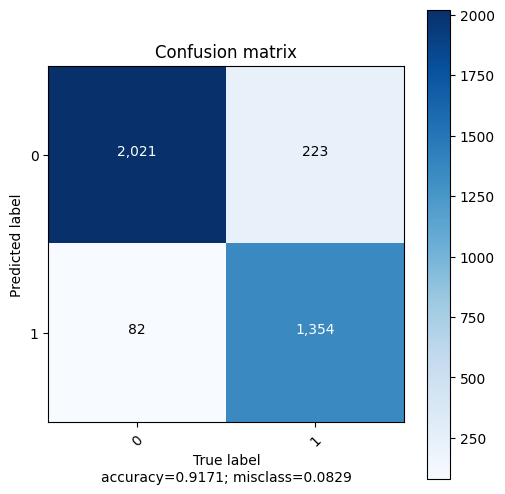

In [152]:
def plot_confusion_matrix(values, classes):
    import itertools
    m, n = values.shape

    accuracy = np.trace(values) / float(np.sum(values))
    misclass = 1 - accuracy

    plt.figure(figsize=(5, 5))
    plt.imshow(values, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion matrix')
    plt.colorbar()

    marks = np.arange(len(classes))
    plt.xticks(marks, classes, rotation=45)
    plt.yticks(marks, classes)

    thresh = values.max() / 2
    for i, j in itertools.product(range(m), range(n)):
        plt.text(j, i, "{:,}".format(values[i, j]),
                 horizontalalignment="center",
                 color="white" if values[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
#Testing the function

plot_confusion_matrix(values = cm, classes = ['0', '1'])


# Normalize funtion
spambase data set

In [153]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [154]:
#1. Load dataset
data = pd.read_csv('spambase.data', header = None)
data.head()

dataset = np.array(data)
m, n = np.shape(dataset)
print('Rows:', m, 'Columns:', n)

x = dataset[:, 0:57]
y = dataset[:, -1]
y = y.reshape(-1, 1)
print('x:', np.shape(x))
print('y:', np.shape(y))

Rows: 4601 Columns: 58
x: (4601, 57)
y: (4601, 1)


In [155]:
#Normalize
def normalize(x):
    x_norm = (x - np.mean(x, axis=0)) / np.std(x,axis=0)
    return x_norm

# scaler = StandardScaler()
# scaler.fit(x)

X_norm = normalize(x)


In [156]:
#2. Prepare data: add Bias and split dataset

print(np.shape(X_norm))

def Bias(X):
    ones = np.ones((len(X),1))
    X1 = np.concatenate((ones, X), axis=1)
    return X1

x = Bias(X_norm)

print('x shape: ', np.shape(x))

test_size = 0.2
xTrain, xTest, yTrain, yTest = train_test_split(x, y,test_size = test_size)
print('Split X', len(x), 'rows into train with', len(xTrain), 'and test with', len(xTest))
print('Split Y', len(y), 'rows into train with', len(yTrain), 'and test with', len(yTest))

yTrain = yTrain.reshape(-1,1)
yTest = yTest.reshape(-1,1)

print('xTrain shape:',np.shape(xTrain), 'yTrain shape:', np.shape(yTrain))
print('xTest shape:', np.shape(xTest), 'yTest shape:', np.shape(yTest))


(4601, 57)
x shape:  (4601, 58)
Split X 4601 rows into train with 3680 and test with 921
Split Y 4601 rows into train with 3680 and test with 921
xTrain shape: (3680, 58) yTrain shape: (3680, 1)
xTest shape: (921, 58) yTest shape: (921, 1)


In [157]:
#3.1 Logistic function
def h(x, w):
    wx = np.dot(x, w.T)
    z = 1 / (1 + np.exp(-wx))
    return z

In [158]:
#3.2 Cost function
def cost(x, y, w):
    m, n = np.shape(x)
    c = (-1 / m)*np.sum(y * np.log(h(x, w)) + (1 - y) * np.log((1 - h(x, w))))
    return c


In [159]:
#3.3 Gradient function
def grad(x, y, w):
    m, n = np.shape(x)
    g = (1 / m) * np.dot(x.T,(h(x, w)-y))
    return g

In [160]:
# 3.4 Gradient Descent function
def gd(x, y, w, alpha = 0.001, its = 1000):
    it = 0
    costo = 0
    J = {}
    while it < its:
        # Gradient
        gradiente = grad(x, y, w)
            
        #Cost function
        costo = cost(x, y, w)
            
        #Updating w
        w = w - alpha * gradiente.T
                
        #Storing cost
        J[it] = costo
   
        it += 1
              
    return w, J

Initial Cost (training data): 0.6931471805599452


C:\Users\diegu\AppData\Local\Temp\ipykernel_18480\4009325281.py:4: RuntimeWarning: divide by zero encountered in log
  c = (-1 / m)*np.sum(y * np.log(h(x, w)) + (1 - y) * np.log((1 - h(x, w))))
C:\Users\diegu\AppData\Local\Temp\ipykernel_18480\4009325281.py:4: RuntimeWarning: invalid value encountered in multiply
  c = (-1 / m)*np.sum(y * np.log(h(x, w)) + (1 - y) * np.log((1 - h(x, w))))


Cost after training (training data): nan
Cost after training (testing data): 0.24148653947563528
W: [[-0.88908203 -0.10851698 -0.1570084   0.05937927  0.26104543  0.38801611
   0.16383915  0.99563167  0.2428744   0.13970308  0.09473378 -0.03932103
  -0.14258732 -0.04076839  0.01055709  0.3779896   0.46876238  0.36743332
   0.13441404  0.21343959  0.36414059  0.38116239  0.36957323  0.87476244
   0.53221959 -1.04927988 -0.63464791 -0.95519897  0.1192336  -0.39636334
  -0.14243944 -0.25697777 -0.12106947 -0.41880544 -0.15891153 -0.35484773
   0.24585722 -0.03536248 -0.08549171 -0.20061563 -0.13230688 -0.35908688
  -0.63941648 -0.21178807 -0.44430488 -0.61091449 -0.65327886 -0.18303985
  -0.40652167 -0.30102385  0.0143738  -0.14456192  0.36873953  1.0813224
   0.27458128  0.20050809  0.59551806  0.41695085]]


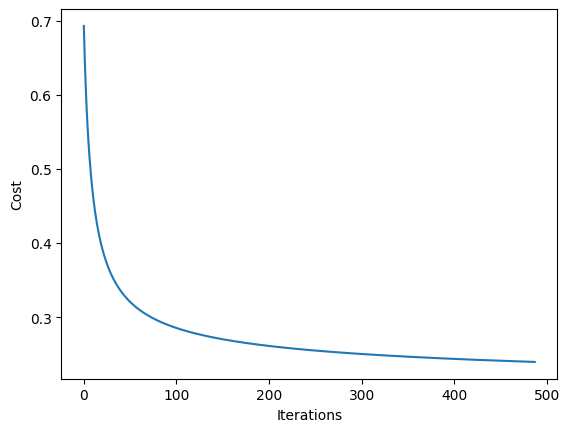

In [161]:
# Test the gradient descent
alpha = 0.1
its = 1000

m, n = np.shape(x)
w = np.zeros((1, n))

print('Initial Cost (training data):', cost(xTrain, yTrain, w))

#Gradient
w, J = gd(xTrain, yTrain, w, alpha, its)

print('Cost after training (training data):', cost(xTrain, yTrain, w))
print('Cost after training (testing data):', cost(xTest, yTest, w))

print('W:',w)

#Plot the cost over the iterations
plt.plot(J.keys(), J.values())
plt.xlabel('Iterations')
plt.ylabel('Cost');

In [162]:
# 4.1 Accuracy

def accuracy(x, y, w):

    Ynew = list(map(lambda x: 1 if x >= 0.5 else 0, h(x, w)))

    Ynew = np.array(Ynew)
    Ynew = Ynew.reshape(-1, 1)
    suma = (y == Ynew).sum()

    a = suma/len(y)

    return a, suma


accTrain, tptnTrain = accuracy(xTrain, yTrain, w)
accTest, tptnTest = accuracy(xTest, yTest, w)
print('Training accuracy:', accTrain, tptnTrain, 'out of', len(yTrain))
print('Testing accuracy:', accTest, tptnTest, 'out of', len(yTest))


Training accuracy: 0.9209239130434783 3389 out of 3680
Testing accuracy: 0.9077090119435396 836 out of 921


In [163]:
# 4.2 Obtain TPR and FPR

# a) Define the prediction function for a variable threshold
def predict(p, threshold):
    y_hat = list(map(lambda x: 1 if x >= threshold else 0, p))
    return y_hat

# b) Define the values function, where you can count the tp, tn, fp, and fn


def values(y, pred):

    # YOURCODE
    tp = tn = fn = fp = 0
    for i in range(len(y)):
        if y[i]:
            if y[i] == pred[i]:
                tp += 1
            else:
                fn += 1
        else:
            if y[i] == pred[i]:
                tn += 1
            else:
                fp += 1

    V = {'TP': tp, 'TN': tn, 'FN': fn, 'FP': fp}
    return V

# c) Define the TPR function


def tpr(V):

    tpr = V["TP"] / (V["TP"] + V["FN"])

    return tpr

# d) Define the FPR function


def fpr(V):

    fpr = V["FP"] / (V["FP"] + V['TN'])

    return fpr


# Test your functions
pred = predict(h(x, w), 0.5)
Val = values(yTrain, pred)
print('Prediction shape: ', np.shape(pred))
print('Values: ', Val)

print('Sensitivity (TPR): %.2F' %
      tpr(Val), 'portion were correctly classified as TP')
print('FPR: %.2F' % fpr(Val), 'portion were classified as FP')


Prediction shape:  (4601,)
Values:  {'TP': 636, 'TN': 1233, 'FN': 795, 'FP': 1016}
Sensitivity (TPR): 0.44 portion were correctly classified as TP
FPR: 0.45 portion were classified as FP


Text(0.5, 1.0, 'Receiver Operating Characteristic')

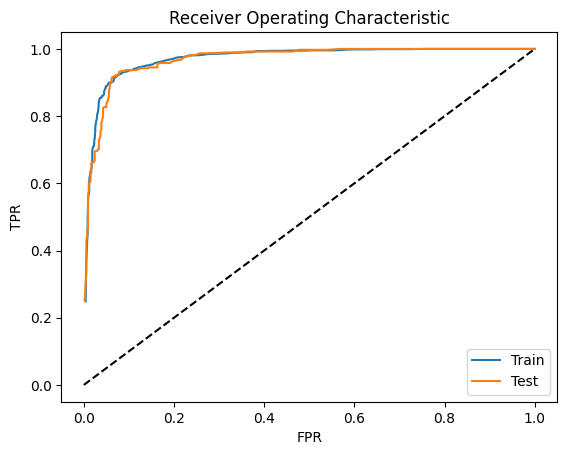

In [164]:
def ROC(y, p):

    # YOURCODE
    threshold = np.arange(0, 1, 0.005)
    TPR = np.zeros(len(threshold))
    FPR = np.zeros(len(threshold))

    for thr in range(len(threshold)):
        pred = predict(p, threshold[thr])
        TPR[thr] = tpr(values(y, pred))
        FPR[thr] = fpr(values(y, pred))

    return TPR, FPR


# ROC curve for Training
Tpr, Fpr = ROC(yTrain, h(xTrain, w))
plt.plot([0, 1], [0, 1], 'k--',)
plt.plot(Fpr, Tpr, '-', label="Train")

# ROC curve for Testing
Tpr1, Fpr1 = ROC(yTest, h(xTest, w))
plt.plot(Fpr1, Tpr1, '-', label="Test")

# Plot the curves
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('Receiver Operating Characteristic')


In [165]:
# AUC (Area under curve) calculus

# AUC for Training
rectangle_roc = 0
rectangle_roc1 = 0
for i in range(len(Tpr)-1):
    rectangle_roc += (Fpr[i] - Fpr[i+1]) * Tpr[i]
print('AUC Training: ', rectangle_roc)

# AUC for Testing

for i in range(len(Tpr1)-1):
    rectangle_roc1 += (Fpr1[i] - Fpr1[i+1]) * Tpr1[i]
print('AUC Testing: ', rectangle_roc1)


AUC Training:  0.9712660553537414
AUC Testing:  0.9691740570573786


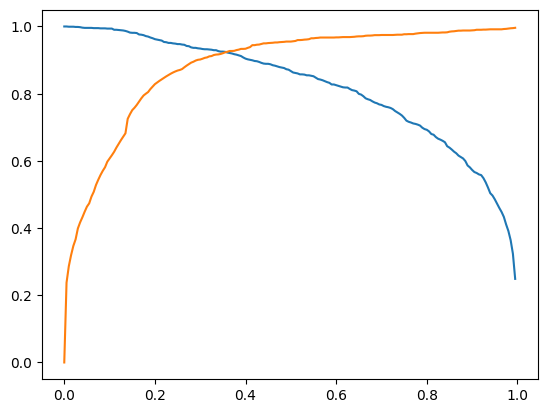

In [166]:
# Specificity and Sensitivity behaviour

thrs = np.arange(0, 1, 0.005)
plt.plot(thrs, Tpr)
plt.plot(thrs, 1 - Fpr)


In [167]:
from sklearn.metrics import confusion_matrix

pred = predict(h(xTrain, w), 0.3)
cm = confusion_matrix(yTrain, pred)
print(cm)

[[2028  221]
 [  94 1337]]


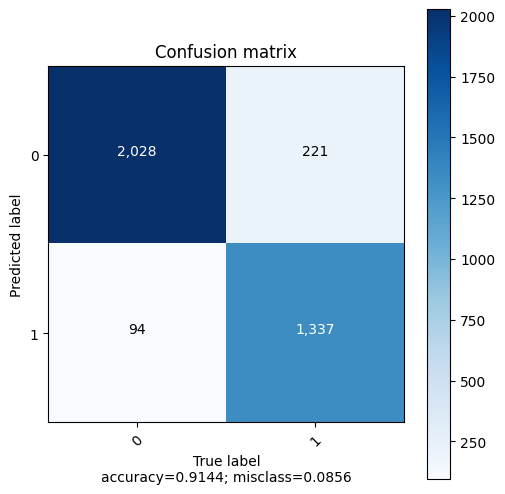

In [168]:
def plot_confusion_matrix(values, classes):
    import itertools
    m, n = values.shape

    accuracy = np.trace(values) / float(np.sum(values))
    misclass = 1 - accuracy

    plt.figure(figsize=(5, 5))
    plt.imshow(values, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion matrix')
    plt.colorbar()

    marks = np.arange(len(classes))
    plt.xticks(marks, classes, rotation=45)
    plt.yticks(marks, classes)

    thresh = values.max() / 2
    for i, j in itertools.product(range(m), range(n)):
        plt.text(j, i, "{:,}".format(values[i, j]),
                 horizontalalignment="center",
                 color="white" if values[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
#Testing the function

plot_confusion_matrix(values = cm, classes = ['0', '1'])
